In [1]:
## Import some libraries
import os 
import numpy as np
import tools 
from generating_Disturbance import Disturbance_generation_from_real_noise
import plot_tools
import FxLMS_algorithm
import matplotlib.pyplot as plt
from select_control_filter import Control_filter_selection
from canceling_noise_fixed_filter import Fixed_filter_controller

In [2]:
## Check the dataset
folder_path = "D:\Coding\Gavin\Selective_ANC_CNN"
tools.check_and_count_data_folders(folder_path)

Training_data contains 79981 files.
Testing_data contains 1981 files.
Validating_data contains 1981 files.


In [3]:
## Import primary path and secondary path
Pri_path, Secon_path = tools.loading_paths_from_MAT()
sound_name = "Speech@24kHz.wav"
waveform, sample_rate = tools.loading_real_wave_noise(sound_name)

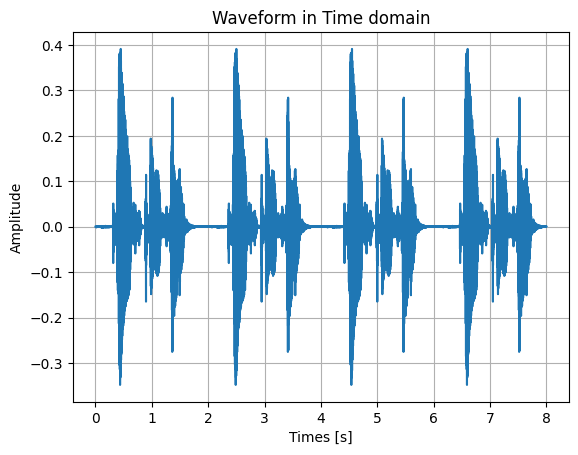

In [4]:
## Generate disturbance signal and reference signal
Dis, Fx, Re = Disturbance_generation_from_real_noise(fs=sample_rate, Repet=3, wave_from=waveform, Pri_path=Pri_path, Sec_path=Secon_path)
Plot1 = plot_tools.WaveVisualizer(Dis,sample_rate)
Plot1.plot_time_domain()

In [5]:
## Using FxLMS to simulate
controller = FxLMS_algorithm.FxLMS_algorithm(len=256)
Error = FxLMS_algorithm.train_fxlms_algorithm(Model=controller, Ref=Fx, Disturbance=Dis, Stepsize=0.005)

[                                                                        ]   0%
[                                                                        ]   1%
[=                                                                       ]   2%
[==                                                                      ]   3%
[===                                                                     ]   5%
[====                                                                    ]   6%
[=====                                                                   ]   7%
[======                                                                  ]   8%
[=======                                                                 ]  10%
[========                                                                ]  11%
[=========                                                               ]  12%
[==========                                                              ]  13%
[==========                             

In [6]:
Plot_Error = plot_tools.WaveVisualizer(np.array(Error),sample_rate)

The SPL is 56.86 dB
The SPL is 46.61 dB


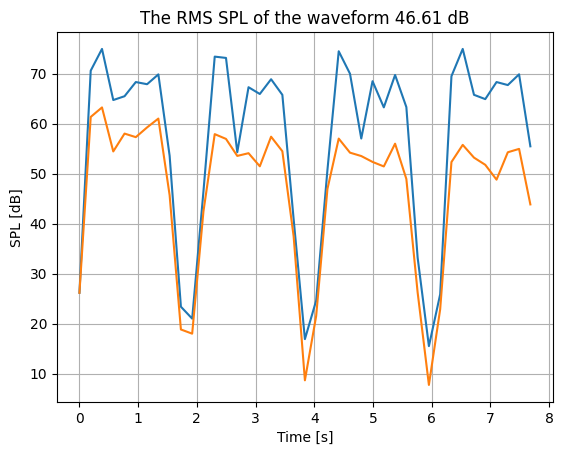

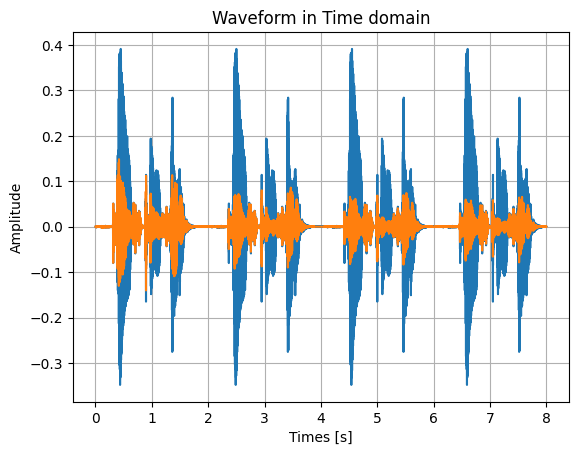

In [7]:
Plot1.plot_RMS_SPL()
Plot_Error.plot_RMS_SPL()
plt.figure()
Plot1.plot_time_domain()
Plot_Error.plot_time_domain()

Data of Boardband_filter_from_5frequencybands.matis existed !!!
torch.Size([5, 1, 16000])
The primary noise has 8 seconds
[0, 0, 0, 0, 0, 0, 0, 0]
The SPL is 23.36 dB
The SPL is 56.86 dB


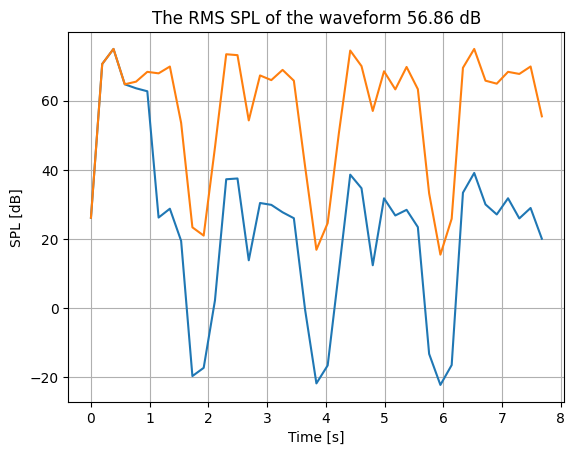

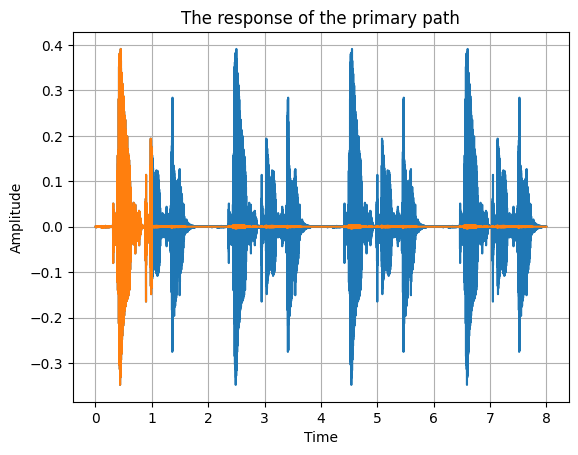

In [13]:
## SFANC
#todo: 1D CNN
id_vector = Control_filter_selection(MODEL_PTH_type=1, fs=16000,num_frequency_bands=4,Primary_noise=Re.unsqueeze(0))
print(id_vector)

FILE_NAME_PATH     = 'Control_filter_from_15frequencies.mat'
Fixed_Cancellation = Fixed_filter_controller(MAT_FILE=FILE_NAME_PATH, fs=16000)
ErroC = Fixed_Cancellation.noise_cancellation(Dis=Dis, Fx=Fx, filter_index=id_vector)

# Drawing the impulse response of the primary path

fig_error = plot_tools.WaveVisualizer(ErroC,16000)
fig_dis = plot_tools.WaveVisualizer(Dis,16000)
fig_error.plot_RMS_SPL()
fig_dis.plot_RMS_SPL()
plt.figure()
plt.title('The response of the primary path')
Time = np.arange(len(Error))*(1/16000)
plt.plot(Time, Dis,Time, ErroC)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid()
plt.show()

c:\Users\admin\.conda\envs\pytorch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\admin\.conda\envs\pytorch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X0_5_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X0_5_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[13, 7, 7, 7, 14, 7, 13, 7]
The SPL is 52.65 dB
The SPL is 56.86 dB


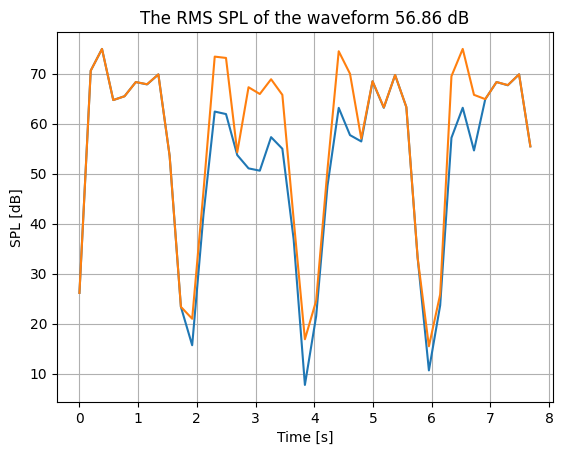

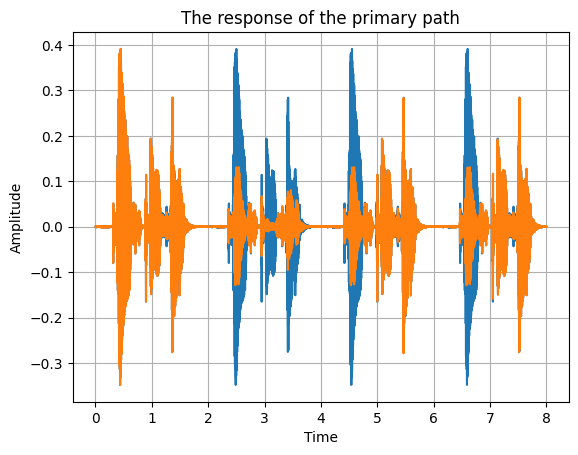

In [9]:
## SFANC
#todo: 2D CNN
from select_control_filter_2D import Control_filter_selection_2D

id_vector = Control_filter_selection_2D(fs=16000,Primary_noise=Re.unsqueeze(0))
print(id_vector)
FILE_NAME_PATH     = 'Control_filter_from_15frequencies.mat'
Fixed_Cancellation = Fixed_filter_controller(MAT_FILE=FILE_NAME_PATH, fs=16000)
ErroC = Fixed_Cancellation.noise_cancellation(Dis=Dis, Fx=Fx, filter_index=id_vector)

# Drawing the impulse response of the primary path

fig_error = plot_tools.WaveVisualizer(ErroC,16000)
fig_dis = plot_tools.WaveVisualizer(Dis,16000)
fig_error.plot_RMS_SPL()
fig_dis.plot_RMS_SPL()
plt.figure()
plt.title('The response of the primary path')
Time = np.arange(len(Error))*(1/16000)
plt.plot(Time, Dis,Time, ErroC)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid()
plt.show()